<a href="https://colab.research.google.com/github/Turing-IA-IHC/AI-Exercises/blob/master/Adversarial_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise to trick an AI from the network model itself
---

## Analysis
<p style='text-align: justify;'></p>
There are Artificial Intelligence (AIs) for medical diagnosis, to find exoplanets, AIs that identify people having heart attacks, AIs that invest in the stock market.

<p style='text-align: justify;'></p>
And everyone expects that it will have better results than a person, in fact when we build the information systems or any program we hope that it does not fail, for example we hope that an accounting program does the accounts well.

<p style='text-align: justify;'></p>
An accountant can be wrong but we hope that the accounting program does not.

<p style='text-align: justify;'></p>
On the other hand, we seek or hope to build artificial intelligence as intelligent as a human being. But it turns out that humans are wrong, so do we expect our AIs to be wrong?

<p style='text-align: justify;'></p>
The emphatic answer is: No. We really hope that our AIs are much better than us, that they can think and not make mistakes, not fail, not be confused. However, how to expect that if it is built by people and people fail, people are confused, wrong and fooled.

<p style='text-align: justify;'></p>
So we could trick an AI in such a way that it has no way of knowing that it was tricked. **Is this possible?**

# Ejercicio para engañar a una IA a partir del propio modelo de la red
---
## Análisis

<p style='text-align: justify;'></p>
Hay Inteligencias Artificiales (IAs) para diagnostico médico, para encontrar exoplanetas, IAs que identifican personas teniendo infartos, IAs que invierten en la bolsa.

<p style='text-align: justify;'></p>
Y todo mundo espera que tenga mejores resultados que una persona, de hecho cuando consitruímos los sistemas de información o cualquier programa esperamos que no falle, por ejemplo esperamos que un programa contable haga bien las cuentas.

<p style='text-align: justify;'></p>
Un contador se puede equivocar pero esperamos que el programa contable no.

<p style='text-align: justify;'></p>
Por otro lado buscamos o esperamos llegar a construir una inteligencia artificial tan inteligente como un ser humano. Pero resulta que los humanos se equivocan, ¿esperamos entonces, que nuestras IAs se equivoquen?.

<p style='text-align: justify;'></p>
La respuesta tajante es: No. Realmente esperamos que nuestras IAs sen mucho mejores que nosotros, que puedan pensar y no equivocarse, no fallar, no dejarse confundir. Sin embargo, como esperar eso si está construído por personas y las personas fallan, a las personas se confunden, se equivocan y se dejan engañar.

<p style='text-align: justify;'></p>
Así pues, por qué no engañar a una IA de forma en que no tenga forma de saber que fue engañada. **¿Será esto posible?**

## Code to prepare enviroment / Código para preparar el entorno

In [1]:
# Load required libraries / Librerías requeridas
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as k

Using TensorFlow backend.


In [2]:
# Download Google inception model / Desacarga del modelo inception de Google
from keras.applications.inception_v3 import  InceptionV3, decode_predictions
iv3 = InceptionV3()

96116736/96112376 [==============================] - 1s 0us/step


In [0]:
# Show net structure / Muestra la estructura de la red
#print(iv3.summary()) 

In [13]:
# Download example image / Descarga la imagen ejemplo
import requests
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQpWCTAsuxLZ3jW00E9X9JG1gboJYGcaolVTmuSBmV5AfpmP84k&usqp=CAU"
#url = "https://imagenes.milenio.com/3MhHAuWR6QNglumdjvOG51qrevE=/958x596/https://www.milenio.com/uploads/media/2020/05/08/detectan-caso-gato-coronavirus-espana_0_0_315_196.jpg"
myfile = requests.get(url)
open("./imgOri.jpg", 'wb').write(myfile.content)

9792

(299, 299, 3)


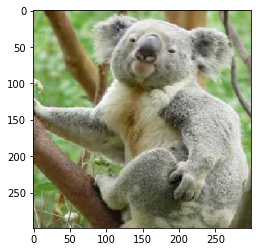

In [14]:
# Load image to process / Carga la imagen para procesar
from keras.preprocessing import image
img = image.img_to_array(image.load_img("./imgOri.jpg", target_size=(299, 299)))
print(img.shape)
plt.imshow(img.astype(np.uint8))
plt.show()

In [16]:
# Adjust the data / Ajuste de los datos
# [0 - 255] => [-1 - +1]
img /= 255
img -= 0.5
img *= 2
# Make a list to process / Crea una lista para procesar
x = np.reshape(img, (1, img.shape[0], img.shape[1], img.shape[2]))
print(x.shape)

(1, 299, 299, 3)


In [17]:
# Predict / Predicción
y = iv3.predict(x)
y = decode_predictions(y)[0][0]
print(y)

('n01882714', 'koala', 0.89114755)


## Start the adversial attack / Inicio del ataque adversario

Now the model itself will be taken and the output image will be adjusted.
<p style='text-align: justify;'></p>
The idea is to take the first and last layer and, subsequently, make the model adjust the input image so that the output is another class without noticing the changes in the image.

Ahora se tomará el propio modelo y se ajustará la imagen de salida. 
<p style='text-align: justify;'></p>
La idea es tomas la primera y ultima capa y, porsteriormente hacer que el modelo ajuste la imagen de entrada de forma que la salida sea otra clase sin que se note los cambios en la image.

List of classes / Lista de clases: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a



In [0]:
# Take the first and last layer / Se toma la primera y última capa
input_layer = iv3.layers[0].input
output_layer = iv3.layers[-1].output

# Class to get / Clase a la que se desea llegar
target_class = 527

# Loss to get / Pérdida a la que se debe llegar
loss = output_layer[0, target_class]

# Gradient to find the difference between the input and the expected class
# The whole graph between the input and the destination cost function will be calculated /
# Gradiente para encontrar la diferencia entre la entrada y la clase esperada
# Se calculará todo el grafo entre la entrada y la funcion de costo destino
grad = k.gradients(loss, input_layer)[0]

# Build a keras function to calc the entire graph /  Se crea una función de keras que ejecutara todo el grafo
optimized_gradiente = k.function([input_layer, k.learning_phase()], [grad, loss])

# Accuracy calculated, expected / Valor de presición calculado, Se espera: 1 (100%)
acc = 0.0

# Make a copy of image to transform / Se crea una copia de la imagen a ajustar
img_fake = np.copy(x)

# Range of disturbed values ​​so that the image is not strongly altered / 
# Rango de valores perturbados para que la imagen no se altere fuertemente
min_pert = x - 0.01
max_pert = x + 0.01

# Loop to iterate on the function that will apply the gradient / 
# Bucle para iterar en la función que aplicará el gradiente
while acc < 0.95:
    gr, acc = optimized_gradiente([img_fake, 0])

    # The value of the gradient is added to the image to make the change /
    # A la imagen se le suma el valor del gradiente para que haga el cambio
    img_fake += gr
    img_fake = np.clip(img_fake, min_pert, max_pert)
    img_fake = np.clip(img_fake, -1, 1)

    print('Acc:', acc)

In [0]:
# Output data is adjusted / Se ajustan los datos de salida
img_fake /=2
img_fake += 0.5
img_fake *= 255

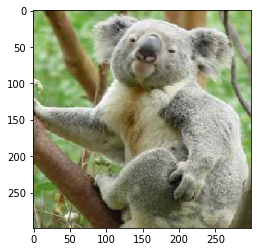

In [0]:
# Show resulting image / Mostrar imagen resultante
plt.imshow(img_fake[0].astype(np.uint8))
plt.show()

In [0]:
# Save result / Guardar resultado
from PIL import Image
img_new = Image.fromarray(img_fake[0].astype(np.uint8))
img_new.save("./imgNew.png")

In [0]:
# Predicton saved file / Predicción con el archivo guardado
img2 = image.img_to_array(image.load_img("./imgNew.png", target_size=(299, 299)))
img2 /= 255
img2 -= 0.5
img2 *= 2
x2 = np.reshape(img2, (1, img2.shape[0], img2.shape[1], img2.shape[2]))
y2 = iv3.predict(x2)
y2 = decode_predictions(y2)[0][0]
print(y2)

('n03180011', 'desktop_computer', 0.9832893)
